In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (6, 4)  # just used to set size of figure plotted

In [2]:
data_set = pd.read_csv('Advertising.csv')

In [3]:
data_set.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


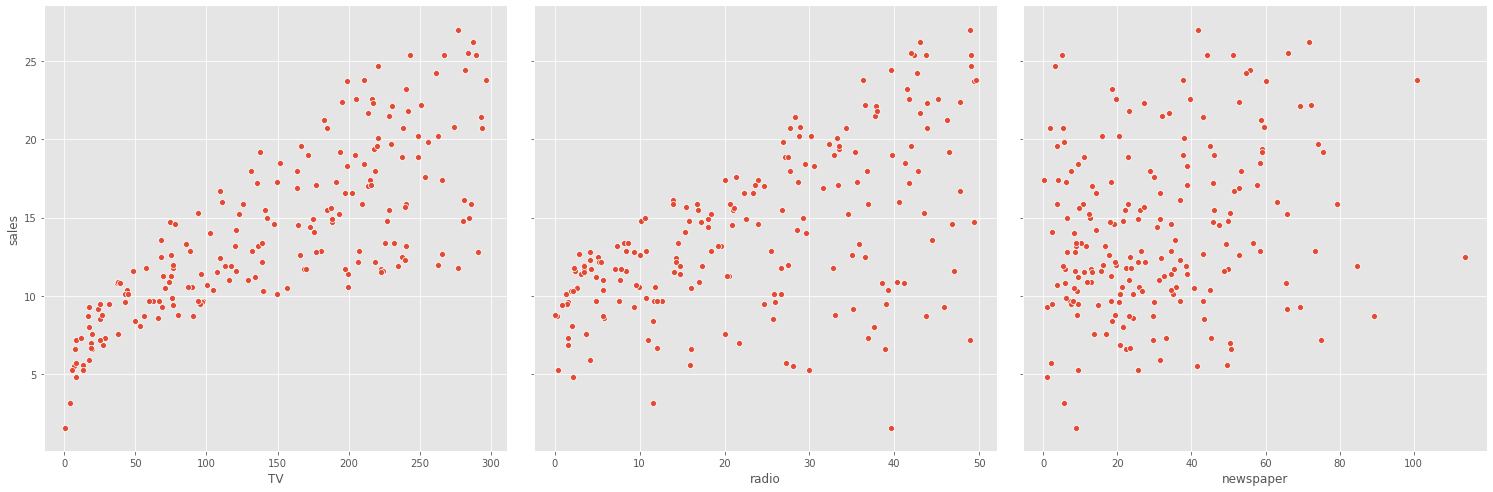

In [5]:
# scatterplots
sns.pairplot(x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', data=data_set, height=7, aspect=1)

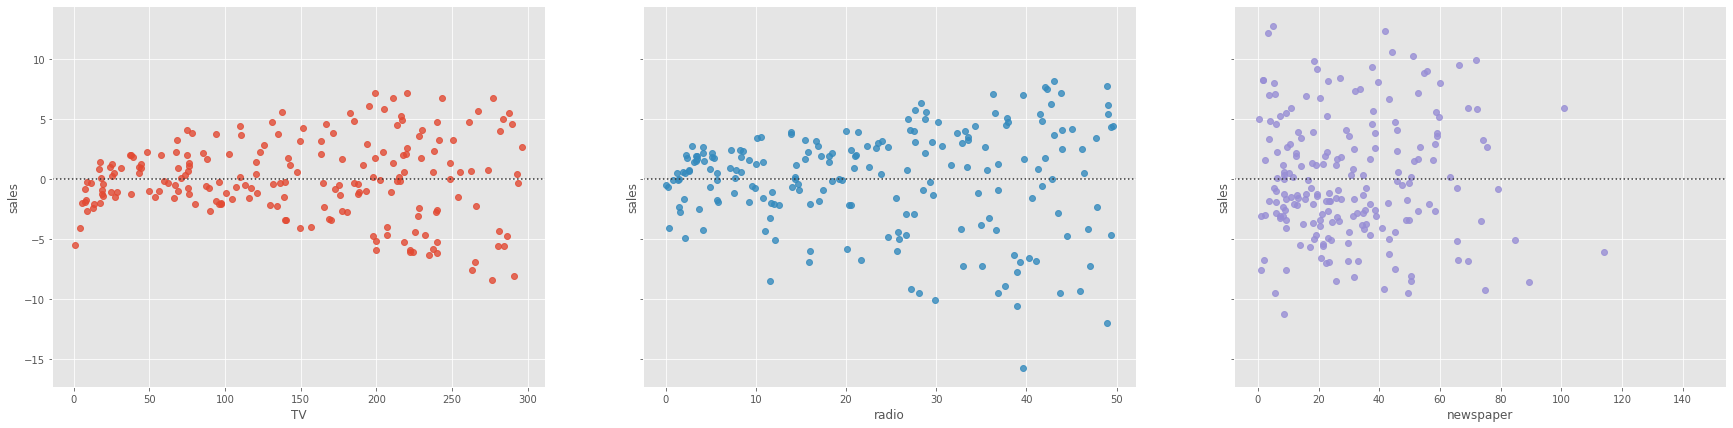

In [6]:
# residualplots
fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(30, 7), sharey='all')
sns.residplot(x=data_set['TV'], y=data_set['sales'], ax=ax1[0])
sns.residplot(x=data_set['radio'], y=data_set['sales'], ax=ax1[1])
sns.residplot(x=data_set['newspaper'], y=data_set['sales'], ax=ax1[2])

Skewness(TV):  -0.06985336213274573
Skewness(Natural_log_TV):  -1.6806691075980271
Skewness(Squareroot_TV):  -0.595978751172028
Skewness(Box_Cox_TV):  -0.32715405872366576


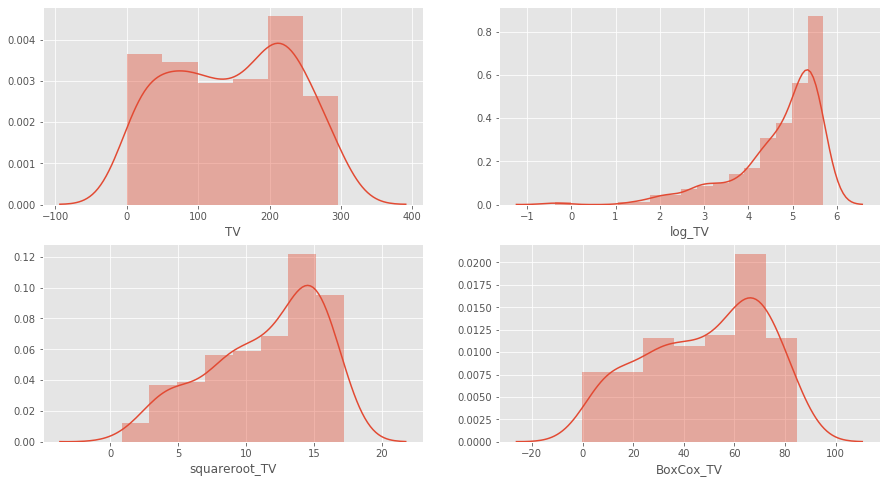

In [7]:
# Histograms for TV
fig2, ax2 =plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# TV
tv = data_set['TV'].values
sns.distplot(a=tv, kde=True, ax=ax2[0][0], axlabel='TV')
 
# TV - log
log_tv = np.log(data_set['TV'].values)
sns.distplot(a=log_tv, kde=True, ax=ax2[0][1], axlabel='log_TV')

# TV - squareroot
squareroot_tv = np.sqrt(data_set['TV'].values)
sns.distplot(a=squareroot_tv, kde=True, ax=ax2[1][0], axlabel='squareroot_TV')

# TV - Box-Cox Transform
from scipy import stats
box_cox_tv = stats.boxcox(x=data_set['TV'].values)[0]
sns.distplot(a=box_cox_tv, kde=True, ax=ax2[1][1], axlabel='BoxCox_TV')

# measure skewness
print('Skewness(TV): ', pd.Series(tv).skew())
print('Skewness(Natural_log_TV): ', pd.Series(log_tv).skew())
print('Skewness(Squareroot_TV): ', pd.Series(squareroot_tv).skew())
print('Skewness(Box_Cox_TV): ', pd.Series(box_cox_tv).skew())

Skewness(radio):  0.09417463149664404
Skewness(Natural_log_radio):  -1.2989609077886024
Skewness(Squareroot_radio):  -0.44315726075567585
Skewness(Box_Cox_radio):  -0.39524361346540593


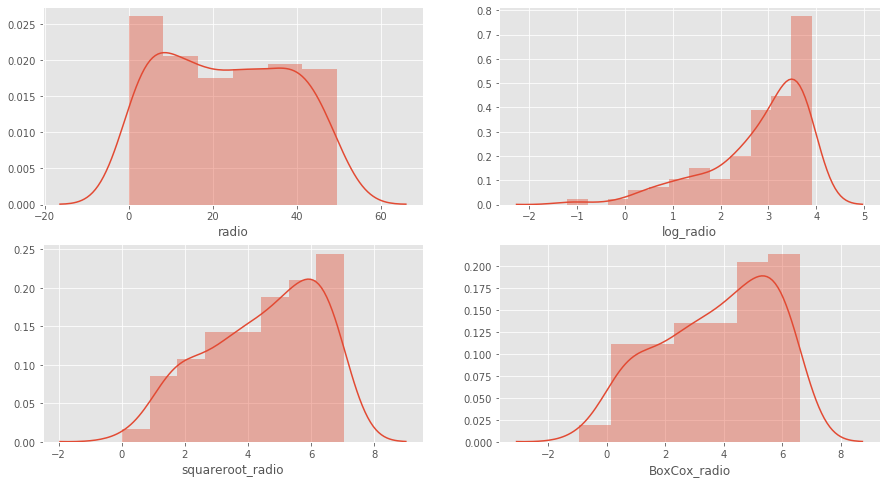

In [8]:
# Histograms for newspaper
fig3, ax3 =plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# radio
radio = data_set['radio'].values
sns.distplot(a=radio, kde=True, ax=ax3[0][0], axlabel='radio')
 
# radio - log
log_radio = [0 if data == 0 else np.log(data) for data in data_set['radio'].values]
sns.distplot(a=log_radio, kde=True, ax=ax3[0][1], axlabel='log_radio')

# radio - squareroot
squareroot_radio = [0 if data == 0 else np.sqrt(data) for data in data_set['radio'].values]
sns.distplot(a=squareroot_radio, kde=True, ax=ax3[1][0], axlabel='squareroot_radio')

# radio - Box-Cox Transform
from scipy import stats
box_cox_radio = stats.boxcox(x=[0.0001 if data == 0 else np.sqrt(data) for data in data_set['radio'].values])[0]
sns.distplot(a=box_cox_radio, kde=True, ax=ax3[1][1], axlabel='BoxCox_radio')

# measure skewness
print('Skewness(radio): ', pd.Series(radio).skew())
print('Skewness(Natural_log_radio): ', pd.Series(log_radio).skew())
print('Skewness(Squareroot_radio): ', pd.Series(squareroot_radio).skew())
print('Skewness(Box_Cox_radio): ', pd.Series(box_cox_radio).skew())

Outlairs(TV):  []
Outlairs(radio): []


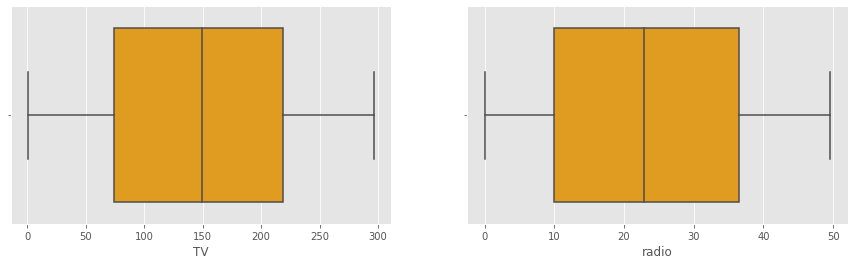

In [9]:
# Boxplots
from scipy import stats
fig4, ax4 =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# TV
sns.boxplot(x=tv, color='orange', ax=ax4[0]) 
ax4[0].set(xlabel="TV")
z_tv = np.abs(stats.zscore(tv))  # z scores for TV values

# radio
sns.boxplot(x=radio, color='orange', ax=ax4[1])
ax4[1].set(xlabel="radio")
z_radio = np.abs(stats.zscore(radio))  # z score of radio values
 
# we will use the threshold of 3 to detect out liars
outlairs_tv = [outliar for outliar in z_tv if outliar > 3]
print(f'Outlairs(TV): ', outlairs_tv)
outlairs_radio = [outliar for outliar in z_radio if outliar > 3]
print(f'Outlairs(radio):', outlairs_radio)

In [10]:
data_set.drop(labels='newspaper', axis=1, inplace=True)  # drop the newspaper column

In [11]:
# correlation matrix used for checking multicolinearity
corr_matrix = data_set.corr()  # correlation matrix
corr_matrix

,TV,radio,sales
TV,1.000000,0.054809,0.782224
radio,0.054809,1.000000,0.576223
sales,0.782224,0.576223,1.000000


(3.0, 0.0)

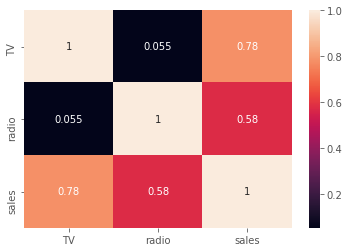

In [12]:
# Heatmap of corelation matrix
ax = sns.heatmap(data=corr_matrix, annot=True)

# below two lines are just to put the heat map or matrix properly 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [13]:
# VIF used for checking multicolinearity
from statsmodels.regression.linear_model import OLS
columns = [column for column in data_set.columns if column != 'sales']  # get all features names

for col in columns:
    t_y = data_set[col].values.reshape(-1, 1)
    t_x = [data_set[c].values.reshape(-1, 1) for c in columns if c != col][0]
    t_x = np.append(arr=np.ones((len(t_y), 1)).astype(int), values=t_x, axis=1)  # add constant ie. 1's
    
    # fit model for respective regressor
    t_x = np.array(t_x, dtype=float)
    ols_tv = OLS(endog=t_y, exog=t_x)
    regressor = ols_tv.fit()
    r_square = regressor.rsquared
    vif = round(1 / (1 - r_square),4)
    print(f'Variation inflation factor(VIF) for column {col} is: ', vif)  # results below is same because we have only 2 columns ie. TV and radio (newspaper is removed before) and as first we check VIF for TV with radio and we check VIF for radio with TV, Therefore we get same results.

Variation inflation factor(VIF) for column TV is:  1.003
Variation inflation factor(VIF) for column radio is:  1.003


In [14]:
# Heteroskedasticity test (Goldfeld-Quandt test) for TV
x_tv = data_set['TV'].values.reshape(-1, 1)
y_tv = data_set['sales'].values.reshape(-1, 1)

x_tv = np.append(arr=np.ones((len(x_tv), 1)).astype(int), values=x_tv, axis=1)  # add constants ie. 1's

# fit model for TV
from statsmodels.regression.linear_model import OLS
x_tv = np.array(x_tv, dtype=float)
x_opt_tv = x_tv[:, [0, 1]]
ols_tv = OLS(endog=y_tv, exog=x_opt_tv)
l_r1 = ols_tv.fit()

# Goldfeld-Quandt test
import statsmodels.stats.api as sms
residuals_tv = l_r1.resid  # gives residuals/errors of all the data points
x_values_tv = l_r1.model.exog  # gives all the x values
name_tv = ['F statistic', 'p-value']
test_tv = sms.het_goldfeldquandt(residuals_tv, x_values_tv)
list(zip(name_tv, test_tv))

[('F statistic', 1.207121297471317), ('p-value', 0.17652851936962863)]

In [15]:
# Heteroskedasticity test (Goldfeld-Quandt test) for radio
x_radio = data_set['radio'].values.reshape(-1, 1)
y_radio = data_set['sales'].values.reshape(-1, 1)

x_radio = np.append(arr=np.ones((len(x_radio), 1)).astype(int), values=x_radio, axis=1)  # add constants ie. 1's

# fit model for radio
from statsmodels.regression.linear_model import OLS
x_radio = np.array(x_radio, dtype=float)
x_opt_radio = x_radio[:, [0, 1]]
ols_radio = OLS(endog=y_radio, exog=x_opt_radio)
l_r2= ols_radio.fit()

# Goldfeld-Quandt test
import statsmodels.stats.api as sms
residuals_radio = l_r2.resid  # gives residuals/errors of all the data points
x_values_radio = l_r2.model.exog  # gives all the x values
name_radio = ['F statistic', 'p-value']
test_radio = sms.het_goldfeldquandt(residuals_radio, x_values_radio)
list(zip(name_radio, test_radio))

[('F statistic', 1.1409213847001907), ('p-value', 0.2576335266276604)]

In [16]:
# removing the Heteroskedasticity of both TV and radio by logging the Y column ie. sales 
y_log = np.log(data_set['sales'].values).reshape(-1, 1)

In [17]:
# Heteroskedasticity test for TV after changing the Y/depending_variable to log scale.
x_tv = data_set['TV'].values.reshape(-1, 1)
y_tv = y_log

x_tv = np.append(arr=np.ones((len(x_tv), 1)).astype(int), values=x_tv, axis=1)  # add constants ie. 1's

# fit model for TV
from statsmodels.regression.linear_model import OLS
x_tv = np.array(x_tv, dtype=float)
x_opt_tv = x_tv[:, [0, 1]]
ols_tv = OLS(endog=y_tv, exog=x_opt_tv)
l_r1 = ols_tv.fit()

# Goldfeld-Quandt test
import statsmodels.stats.api as sms
residuals_tv = l_r1.resid  # gives residuals/errors of all the data points
x_values_tv = l_r1.model.exog  # gives all the x values
name_tv = ['F statistic', 'p-value']
test_tv = sms.het_goldfeldquandt(residuals_tv, x_values_tv)
list(zip(name_tv, test_tv))

[('F statistic', 1.7246853898350476), ('p-value', 0.003740697194331791)]

In [18]:
# Heteroskedasticity test for radio after changing the Y/depending_variable to log scale.
x_radio = data_set['radio'].values.reshape(-1, 1)
y_radio = y_log

x_radio = np.append(arr=np.ones((len(x_radio), 1)).astype(int), values=x_radio, axis=1)  # add constants ie. 1's

# fit model for radio
from statsmodels.regression.linear_model import OLS
x_radio = np.array(x_radio, dtype=float)
x_opt_radio = x_radio[:, [0, 1]]
ols_radio = OLS(endog=y_radio, exog=x_opt_radio)
l_r2= ols_radio.fit()

# Goldfeld-Quandt test
import statsmodels.stats.api as sms
residuals_radio = l_r2.resid  # gives residuals/errors of all the data points
x_values_radio = l_r2.model.exog  # gives all the x values
name_radio = ['F statistic', 'p-value']
test_radio = sms.het_goldfeldquandt(residuals_radio, x_values_radio)
list(zip(name_radio, test_radio))

[('F statistic', 1.645835307894651), ('p-value', 0.007194490259337703)]

[Text(0, 0.5, 'sales'),
 Text(0.5, 0, 'radio'),
 Text(0.5, 1.0, 'Residual plot for radio')]

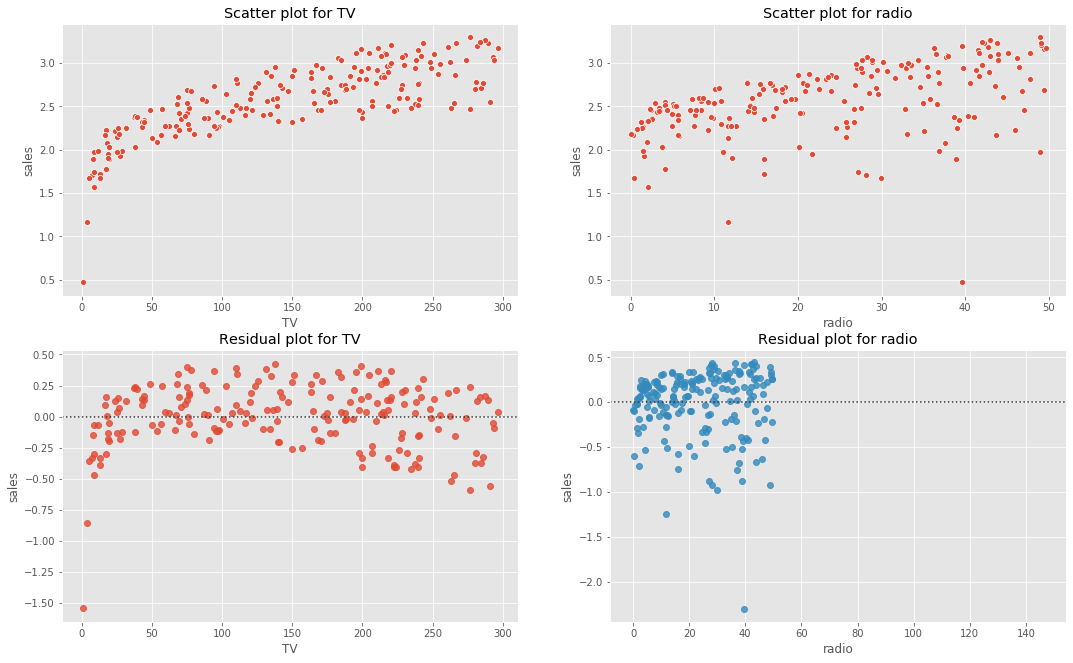

In [19]:
# Visualizing the data after removing Heteroskedasticity

# convert the arrays from 2D ot 1D as scatterplot takes 1D array as argument
x_tv_1D = [d[1] for d in x_tv]
x_radio_1D = [d[1] for d in x_radio]
y_log_1D = [d[0] for d in y_log]

fig5, ax5 = plt.subplots(nrows=2, ncols=2, figsize=(18, 11))

# scatterplots
sns.scatterplot(x=x_tv_1D, y=y_log_1D, ax=ax5[0][0]) # tv
ax5[0][0].set(xlabel="TV", ylabel = "sales", title='Scatter plot for TV')

sns.scatterplot(x=x_radio_1D, y=y_log_1D, ax=ax5[0][1])  # radio
ax5[0][1].set(xlabel="radio", ylabel = "sales", title='Scatter plot for radio')

#residual plots
sns.residplot(x=x_tv_1D, y=y_log_1D, ax=ax5[1][0]) # tv
ax5[1][0].set(xlabel="TV", ylabel = "sales", title='Residual plot for TV')

sns.residplot(x=x_radio_1D, y=y_log_1D, ax=ax5[1][1])  # radio
ax5[1][1].set(xlabel="radio", ylabel = "sales", title='Residual plot for radio')

# Making model

In [20]:
# Dividing data into dependent and independent variables
X = data_set.loc[:, ['TV', 'radio']].values
X = np.append(arr=np.ones((len(X), 1)).astype(int), values=X, axis=1)  # add constants ie. 1's
Y = np.log(data_set['sales'].values).reshape(-1, 1)

[(130, 0.47000362924573563), (155, 1.1631508098056809)]


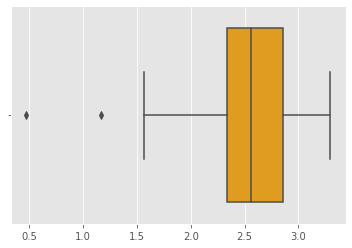

In [21]:
# check for outliars in dependent or Y variable ie. sales
sns.boxplot(x=Y, color='orange')
outliars = [(index, outliar) for outliar, index in zip(y_log_1D, range(0, len(Y))) if outliar < 1.5]  # get outliar and its respective index
print(outliars)

In [22]:
# Removing the row 130 and 155 from X and Y as they are outliars acc. to log of sales
X = [value for value, index in zip(X, range(0, len(X))) if index != 130 and index != 155]
Y = [value for value, index in zip(Y, range(0, len(Y))) if index != 130 and index != 155]

In [23]:
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20)
x_train = np.array(x_train, dtype=float)
new_x_opt = x_train[:, [0,1,2]]
ols = OLS(endog=y_train, exog=new_x_opt)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     541.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.11e-70
Time:                        08:54:47   Log-Likelihood:                 99.227
No. Observations:                 158   AIC:                            -192.5
Df Residuals:                     155   BIC:                            -183.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7894      0.026     67.704      0.000       1.737       1.842
x1             0.0034      0.000     28.003      0.000       0.003       0.004
x2             0.0121      0.001     16.769      0.000       0.011       0.014
==============================================================================
Omnibus:                       55.375   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.298
Skew:                          -1.598   Prob(JB):                     9.19e-26
Kurtosis:                       5.703   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model.params  # coefficients

array([1.7894402 , 0.0034481 , 0.01207824])

In [25]:
predicted_Y = model.predict(x_test)  # predict y test values

In [26]:
# bringing the values to the original scale ie. converting log scale of sales to original scale of sales.
predicted_values = [round(2.718**d, 2) for d in predicted_Y]
real_values = [round(2.718**d[0], 2) for d in y_test]

In [27]:
# compare values
data = [(r, p) for r, p in zip(real_values, predicted_values)]
df = pd.DataFrame(data=data, index=range(0, len(predicted_values)), columns=['Real_values', 'Predicted_values'])

In [28]:
df.head()

,Real_values,Predicted_values
0,17.29,16.36
1,11.60,10.05
2,9.70,8.79
3,9.30,11.06
4,19.79,19.98


In [29]:
# Apply k-fold cross validation where k is 5
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=1999) # Define the split - into 5 folds 
k = kf.get_n_splits(X) # returns the number of folds
print('Number of folds:', k)

r_squared = []
adj_r_squared = []

for train_index, test_index in kf.split(X):  # returns k train and test indexes
    x_train = [X[index] for index in train_index]
    y_train = [Y[index] for index in train_index]
    x_test = [X[index] for index in test_index]
    y_test = [Y[index] for index in test_index]
    
    ols = OLS(endog=y_train, exog=x_train)
    model = ols.fit()
    
    r_squared.append(model.rsquared)
    adj_r_squared.append(model.rsquared_adj)

Number of folds: 5


In [30]:
# Results
print(f'Max r_squared: {round(max(r_squared), 5)}')
print(f'Min r_squared: {round(min(r_squared), 5)}')
print(f'Average r_squared: {round(np.average(r_squared), 5)}')
print()
print(f'Max adj_r_squared: {round(max(adj_r_squared), 5)}')
print(f'Min adj_r_squared: {round(min(adj_r_squared), 5)}')
print(f'Average adj_r_squared: {round(np.average(adj_r_squared), 5)}')

Max r_squared: 0.89759
Min r_squared: 0.87958
Average r_squared: 0.88893

Max adj_r_squared: 0.89628
Min adj_r_squared: 0.87802
Average adj_r_squared: 0.8875
